# Missing Data Handling in Python
This notebook covers different types of missing data handling techniques using Python with detailed examples.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For display purposes
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


## Creating a Sample Dataset

In [ ]:

# Create a sample dataset with various types of missing data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Edward'],
    'Age': [25, np.nan, 30, 22, np.nan],
    'Gender': ['F', 'M', np.nan, 'M', 'M'],
    'Income': [50000, 60000, np.nan, np.nan, 70000],
    'Department': ['HR', 'Finance', 'HR', 'Finance', None]
}

df = pd.DataFrame(data)
df


,Name,Age,Gender,Income,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,NaN,M,60000.0,Finance
2,Charlie,30.0,NaN,NaN,HR
3,David,22.0,M,NaN,Finance
4,Edward,NaN,M,70000.0,None


## Identifying Missing Data

In [ ]:

df.isnull()


,Name,Age,Gender,Income,Department
0,False,False,False,False,False
1,False,True,False,False,False
2,False,False,True,True,False
3,False,False,False,True,False
4,False,True,False,False,True


In [ ]:

df.isnull().sum()


,0
Name,0
Age,2
Gender,1
Income,2
Department,1


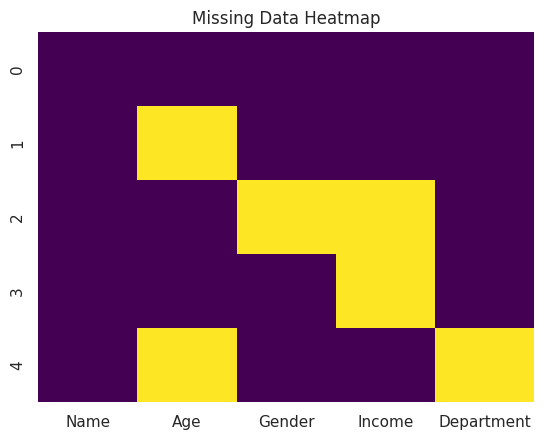

In [ ]:

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


## Handling Missing Data by Dropping

In [ ]:

# Drop rows with any missing values
df_drop_any = df.dropna()
df_drop_any


,Name,Age,Gender,Income,Department
0,Alice,25.0,F,50000.0,HR


In [ ]:

# Drop rows only if all columns are NA
df_drop_all = df.dropna(how='all')
df_drop_all


,Name,Age,Gender,Income,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,NaN,M,60000.0,Finance
2,Charlie,30.0,NaN,NaN,HR
3,David,22.0,M,NaN,Finance
4,Edward,NaN,M,70000.0,None


In [ ]:

# Drop columns with any missing values
df_drop_cols = df.dropna(axis=1)
df_drop_cols


,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Edward


## Handling Missing Data by Filling

In [ ]:

# Fill with a specific value
df_fill_value = df.fillna(value={'Age': 0, 'Income': df['Income'].mean()})
df_fill_value


,Name,Age,Gender,Income,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,0.0,M,60000.0,Finance
2,Charlie,30.0,NaN,60000.0,HR
3,David,22.0,M,60000.0,Finance
4,Edward,0.0,M,70000.0,None


In [ ]:

# Forward fill
df_ffill = df.fillna(method='ffill')
df_ffill


<ipython-input-11-f650e135c56e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')


,Name,Age,Gender,Income,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,25.0,M,60000.0,Finance
2,Charlie,30.0,M,60000.0,HR
3,David,22.0,M,60000.0,Finance
4,Edward,22.0,M,70000.0,Finance


In [ ]:

# Backward fill
df_bfill = df.fillna(method='bfill')
df_bfill


<ipython-input-12-7a92d86f682a>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


,Name,Age,Gender,Income,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,30.0,M,60000.0,Finance
2,Charlie,30.0,M,70000.0,HR
3,David,22.0,M,70000.0,Finance
4,Edward,NaN,M,70000.0,None


## Imputation using Scikit-learn

In [ ]:

from sklearn.impute import SimpleImputer

# Numerical columns
num_imputer = SimpleImputer(strategy='mean')
df[['Age', 'Income']] = num_imputer.fit_transform(df[['Age', 'Income']])

# Categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Gender', 'Department']] = cat_imputer.fit_transform(df[['Gender', 'Department']])

df


,Name,Age,Gender,Income,Department
0,Alice,25.000000,F,50000.0,HR
1,Bob,25.666667,M,60000.0,Finance
2,Charlie,30.000000,M,60000.0,HR
3,David,22.000000,M,60000.0,Finance
4,Edward,25.666667,M,70000.0,None


## Advanced Imputation: KNN

In [ ]:

from sklearn.impute import KNNImputer

# Re-introduce missing data for demonstration
df_knn = pd.DataFrame({
    'Age': [25, np.nan, 30, 22, np.nan],
    'Income': [50000, 60000, np.nan, np.nan, 70000]
})

knn_imputer = KNNImputer(n_neighbors=2)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)
df_knn_imputed


,Age,Income
0,25.0,50000.0
1,25.0,60000.0
2,30.0,50000.0
3,22.0,50000.0
4,25.0,70000.0
